# Comparative Study of LDA Implementation

## Description of Data

Sonnet Data Set: 

It is a text file containing all of William Shakespeare's sonnets. We have preprocessed the data by removing all the punctuations and symbols. Also, each sonnet is separated by two newline characters. The sonnet has been written in old English and hence few words in the topics are outmoded. 



In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# Reding data from file
with open('/content/drive/MyDrive/NEU /sonnetsPreprocessed.txt', 'r', encoding='UTF-8') as f1:
  sonnets_data = f1.readlines()

print(type(sonnets_data))

<class 'list'>


In [81]:
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
dataset = open('/content/drive/MyDrive/NEU /sonnetsPreprocessed.txt', "r").read()
def create_word_cloud(string):
   maskArray = npy.array(Image.open("/content/drive/MyDrive/NEU /cloud.png"))
   cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
dataset = dataset.lower()
create_word_cloud(dataset)

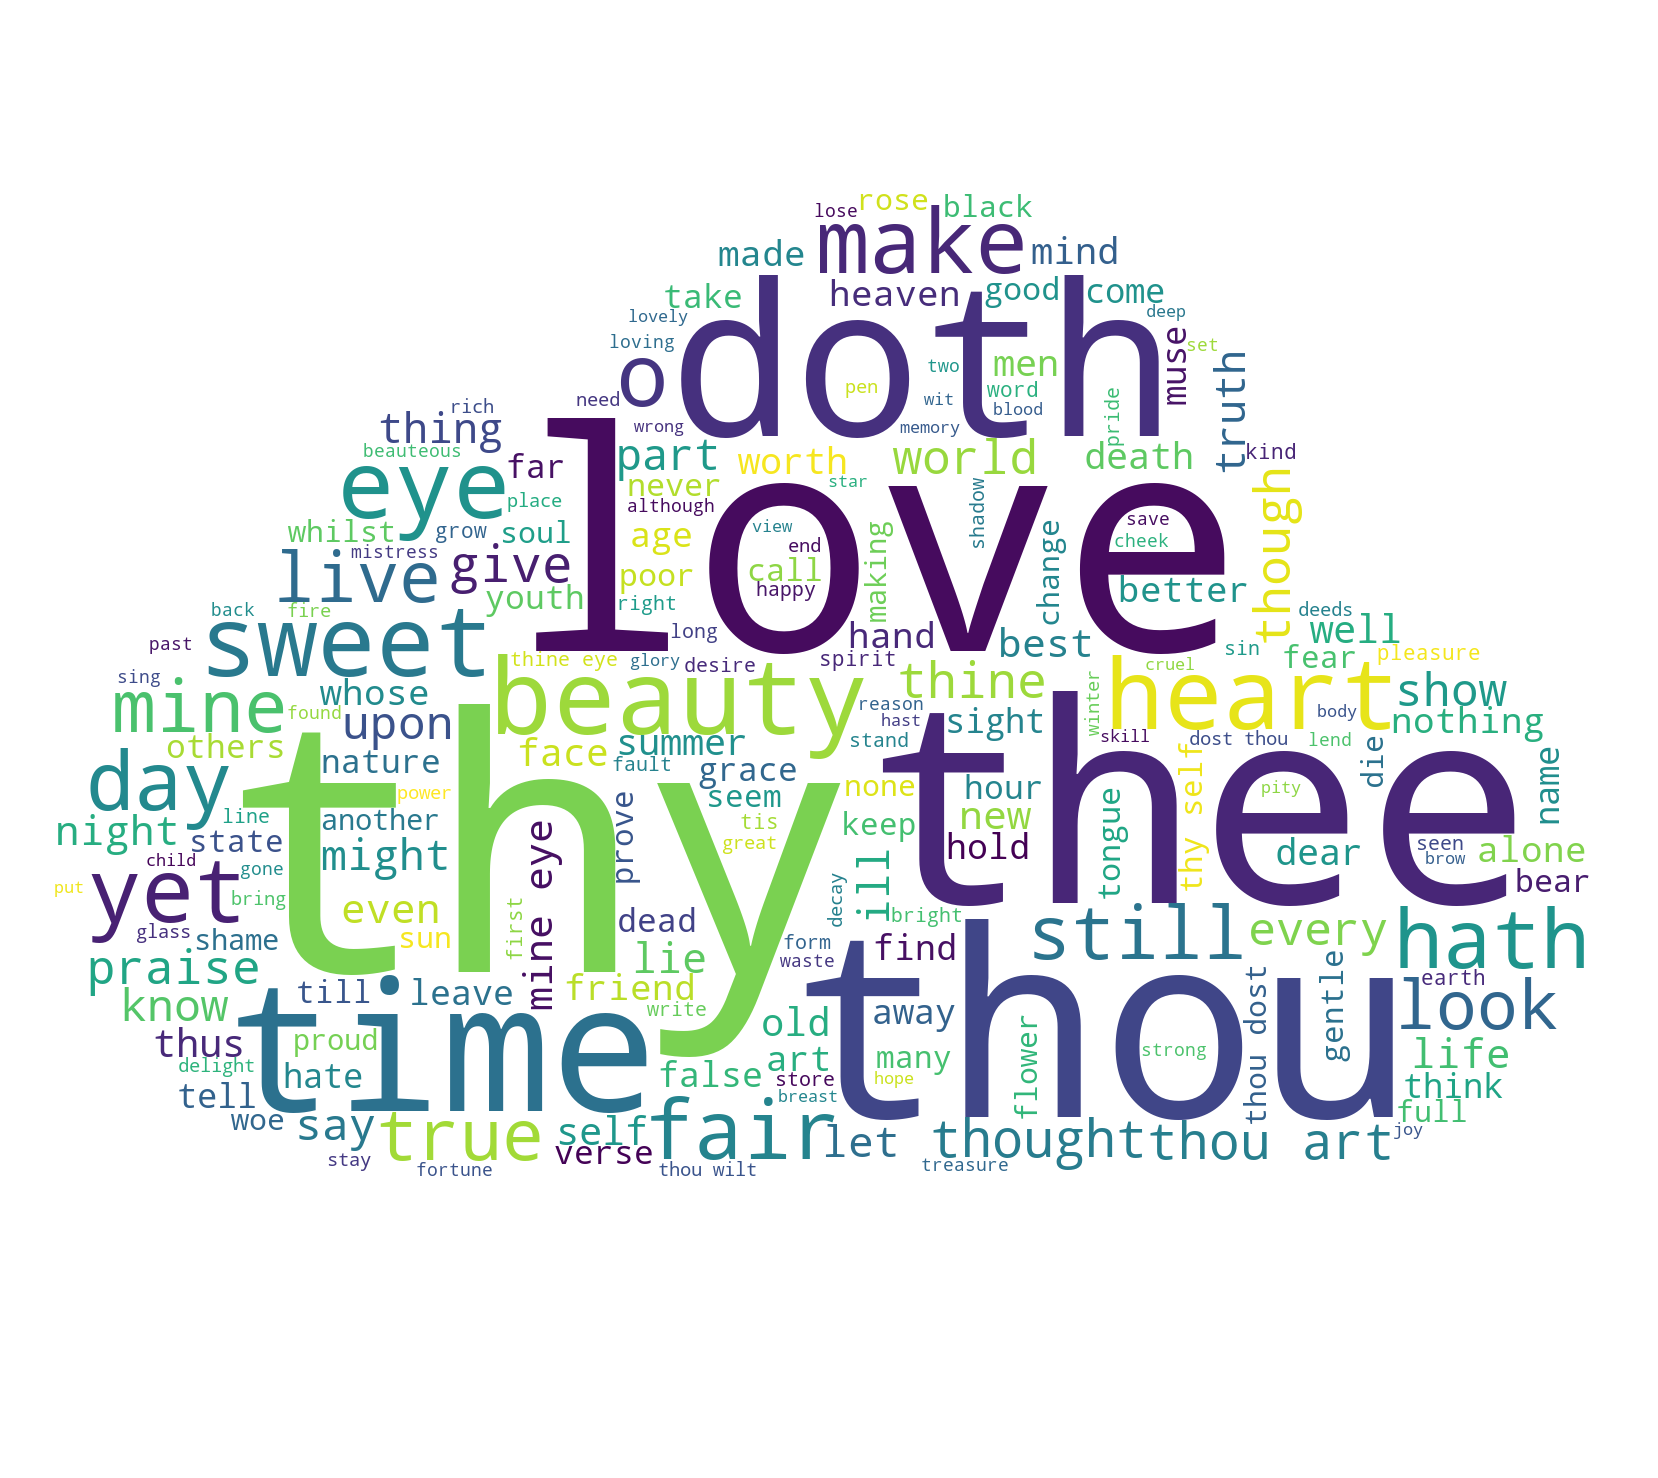

In [82]:
from IPython.display import Image
Image('/content/wordCloud.png')

In [ ]:
for line in range(len(sonnets_data)):
  # Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
import numpy as np
import random
import sklearn.datasets
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, ImageColorGenerator

In [67]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=10000,
                                stop_words='english',token_pattern = r'\b\w{4,}\b', analyzer= 'word')
tf = tf_vectorizer.fit_transform(sonnets_data)
tfidf_feature_names = tf_vectorizer.get_feature_names()
vocab = tf_vectorizer.vocabulary_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Latent Dirichlet Allocation with SKLearn


In [52]:
import time

# get the start time
st = time.time()

lda = LatentDirichletAllocation(n_components=7, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [53]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [54]:
no_top_words = 10
topics = display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
love heart eyes doth thou like beauty know loves sweet
Topic 1:
doth making thee worse shall bright clear praise fair writ
Topic 2:
thou thee love thine doth heart make eyes fair hath
Topic 3:
proof lips truly wastes kind kiss eyes lovers farthest blessed
Topic 4:
sorrow true bosoms hell humble brass tyrant unless leisure steel
Topic 5:
shall thou earth death sinful dost pine soul live thee
Topic 6:
love thou thee time hath honour like loves world triumph


In [55]:
# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 3.450340747833252 seconds


# Latent Dirichlet Allocation with Gensim

In [56]:
# gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

In [57]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [58]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import time

# get the start time
st = time.time()

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [59]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))

words = list(sent_to_words(sonnets_data))
#words[:2]

In [60]:
bigram = gensim.models.Phrases(words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['fairest', 'creatures', 'desire', 'increase', 'thereby', 'beautys', 'rose', 'might', 'never', 'die', 'riper', 'time', 'decease', 'tender', 'heir', 'might', 'bear', 'memory', 'thou', 'contracted', 'thine', 'own', 'bright', 'eyes', 'feedst', 'thy', 'lights', 'flame', 'selfsubstantial', 'fuel', 'making', 'famine', 'abundance', 'lies', 'thy', 'self', 'thy', 'foe', 'thy', 'sweet', 'self', 'cruel', 'thou', 'art', 'worlds', 'fresh', 'ornament', 'herald', 'gaudy', 'spring', 'thine', 'own', 'bud', 'buriest', 'thy', 'content', 'tender', 'churl', 'makst', 'waste', 'niggarding', 'pity', 'world', 'else', 'glutton', 'eat', 'worlds', 'due', 'grave', 'thee']


In [61]:
# Remove Stop Words
data_words_nostops = remove_stopwords(words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])

#print(data_lemmatized[:1])

In [62]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
#print(corpus[:1])

In [63]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 3.745823860168457 seconds


# Latent Dirichlet Allocation from Scratch (Gibbs Sampling)



In [16]:
#remove words less than 4
vectorizer3 = CountVectorizer(stop_words='english', token_pattern = r'(?u)\b[a-z]{4,}\b')  
sonnet_cv = vectorizer3.fit_transform(sonnets_data)
sonnet_cv_array = sonnet_cv.toarray()
vocabulary_sonnet =  vectorizer3.get_feature_names_out()

In [17]:
#preprocess data
def trans_cv_to_index(bow_array):
  '''
  transform doc-bagofwords to doc-indexofwords matrix
  input: doc-bagofwords 2d-array and a vocabulary dic
  output:matrix
    row: index for word in vocabulary dic. length of every row is equal to number of words in a doc.
       use  50000 represent space(onln the longest doc have no space at the end)
  '''
  N_docs = bow_array.shape[0]
  DLMAX = bow_array.sum(1).max()

  DOCS = np.ones((N_docs, DLMAX)) * 50000
  DOCS = DOCS.astype(int)

  for i in range(N_docs):
    indexes = np.where(bow_array[i]>0)[0]
    total = 0
    for index in indexes:
      DOCS[i,total:total+bow_array[i][index]] = index
      total = total+bow_array[i][index]
  
  return DOCS

In [18]:
def LDA_function(K_topics, data, vocabulary, iterations):
    DOCS = data.copy()

    #Number of documents
    N_docs = DOCS.shape[0]

    #Number of topics
    K_topics = K_topics

    #Word Vocabulary
    W_vocab = len(vocabulary)
    docs_len = (DOCS != 50000).sum(1)
    
   
    #1 x K array alpha : dirichlet uniform prior of doc over topics; below 5-1=4 is the strength of the prio
    alpha = 5 * np.ones((1, K_topics))

    # 1 x W array beta: dirichlet unif prior of topic over words; 2-1=1 is the strength of the prior
    beta = 2 * np.ones((1, W_vocab))

    #A store count of topics sampled for docs
    #initialize with psudo counts of topics from porior alpha
    A = np.repeat(alpha, N_docs, 0)    

    #B store count of topics samples for words
    #initialize with psudo counts of topics from porior beta
    B = np.repeat(beta, K_topics, 0)   

    #N x DLMAX matrix Z[d,i] = k ; topic k currently sampled for i-th word in doc d
    #initialize with random topics
    Z_matrix = np.ones(DOCS.shape) * 50000   
    #50000 represents pads(space)          
    Z_matrix = Z_matrix.astype(int)

    #initialize Z_matrix with ramdom topics 
    #and add sample count to A and B (updata)
    for d in range(N_docs):
        for w in range(docs_len[d]):
            sample_topic = np.random.randint(0,K_topics)
            Z_matrix[d, w] = sample_topic
            A[d, sample_topic] += 1           #add +1 to topic of a doc 
            B[sample_topic, DOCS[d, w]] += 1     #add +1 to topic of a w

    #B store count of words for topics
    BSUM = B.sum(1)
    
    for itera in range(iterations):
        for d in range(N_docs):
            for w in range(docs_len[d]):
                word = DOCS[d, w]  #current word
                z_i = Z_matrix[d, w]  #current topic
                
                #substract count in A and B
                #subtract current topic zi from counts
                A[d, z_i] -= 1 
                B[z_i, word] -= 1
                BSUM[z_i] -= 1
                
                #caculate conditional 
                dst = A[d,:] * (B[:,word] / BSUM)
                #print(dst)
                dst = dst/sum(dst)
                #print(dst)
                
                #sample new z_i
                new_z_i = np.random.choice(K_topics, 1, p=dst)
                Z_matrix[d, w] = new_z_i
                
                #update A B BSUM
                A[d, new_z_i] += 1 
                B[new_z_i, word] += 1
                BSUM[new_z_i] += 1
    B_prob = B / B.sum(1, keepdims=True)
    return A, B, BSUM, B_prob

In [19]:
#plot wordcloud

import matplotlib.pyplot as plt
def plot_word_cloud(B_prob, vocabulary, top_n_words=30):
    '''
    input: 
        B_prob: probability matrix for topic-words
        vocabulary:word v
    output:
        word cloud
    '''
    wordcloud = WordCloud(background_color='white', colormap='inferno', prefer_horizontal=1)
    topics = B_prob.shape[0]
    sorted_words_index_for_topics = np.argsort(B_prob, axis = 1)
    sorted_words_prob_for_topics = np.sort(B_prob, axis = 1)
    nrows = 2 if int(np.ceil(topics/3))==1 else int(np.ceil(topics/3))
    fig, axs = plt.subplots(nrows ,3, figsize=(20, 10))
    for topic in range(topics):
        dim_0 = int(topic/3)
        dim_1 = topic%3
        d = {w: f for w, f in
                zip(vocabulary[sorted_words_index_for_topics[topic]][-top_n_words:], sorted_words_prob_for_topics[topic,-top_n_words:])}
        wordcloud.generate_from_frequencies(frequencies=d)
        axs[dim_0,dim_1].imshow(wordcloud)

In [20]:
DOCS_sonnet = trans_cv_to_index(sonnet_cv_array)

In [21]:
import time

# get the start time
st = time.time()

A, B, BSUM, B_prob = LDA_function(6, DOCS_sonnet, vocabulary_sonnet, 100)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 52.92995262145996 seconds


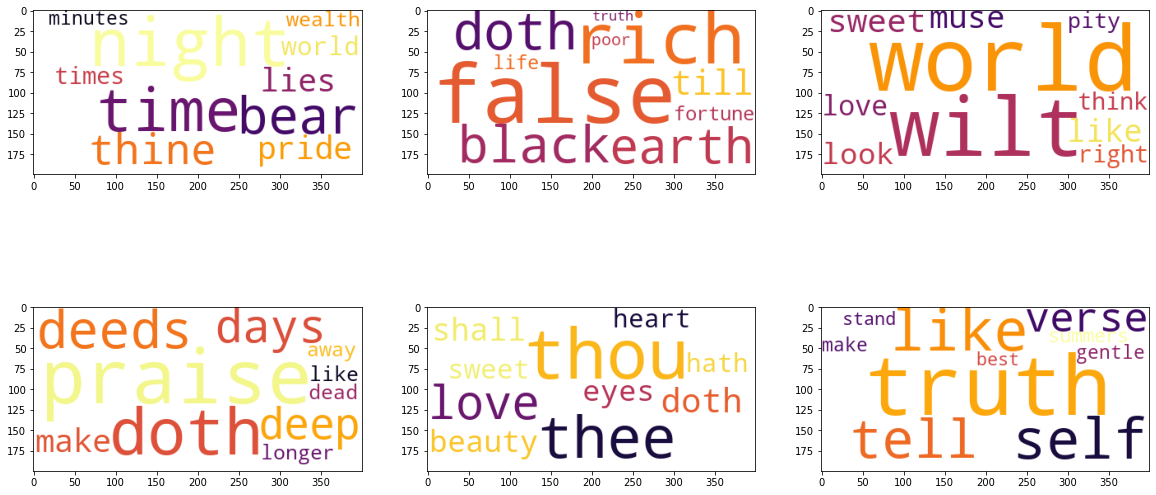

In [22]:
plot_word_cloud(B_prob,vocabulary_sonnet, 10)

# Latent Dirichlet Allocation from Scratch (EM Algo)



In [39]:
from nltk.corpus import reuters
from nltk.corpus import stopwords

In [40]:
import time

# get the start time
st = time.time()


def init_lda(docs, vocab, n_topic, gibbs=False, random_state=0):
    if gibbs:
        global V, k, N, M, alpha, eta, n_iw, n_di
    else:
        global V, k, N, M, alpha, beta, gamma, phi
        
    np.random.seed(random_state)

    V = len(vocab)
    k = n_topic  # number of topics
    N = np.array([doc.shape[0] for doc in docs])
    M = len(docs)

    print(f"V: {V}\nk: {k}\nN: {N[:10]}...\nM: {M}")

    # initialize α, β
    
    if gibbs:
        alpha = np.random.gamma(shape=100, scale=0.01, size=1)  # one for all k
        eta = np.random.gamma(shape=100, scale=0.01, size=1)  # one for all V
        print(f"α: {alpha}\nη: {eta}")
        
        n_iw = np.zeros((k, V), dtype=int)
        n_di = np.zeros((M, k), dtype=int)
        print(f"n_iw: dim {n_iw.shape}\nn_di: dim {n_di.shape}")
    else:
        alpha = np.random.gamma(shape=100, scale=0.01, size=k) #np.random.rand(k)
        beta = np.random.dirichlet(np.ones(V), k)
        print(f"α: dim {alpha.shape}\nβ: dim {beta.shape}")

        # initialize ϕ, γ
        ## ϕ: (M x max(N) x k) arrays with zero paddings on the right
        gamma = alpha + np.ones((M, k)) * N.reshape(-1, 1) / k

        phi = np.ones((M, max(N), k)) / k
        for m, N_d in enumerate(N):
            phi[m, N_d:, :] = 0  # zero padding for vectorized operations

        print(f"γ: dim {gamma.shape}\nϕ: dim ({len(phi)}, N_d, {phi[0].shape[1]})")

In [41]:
def E_step(docs, phi, gamma, alpha, beta):
    """
    Minorize the joint likelihood function via variational inference.
    This is the E-step of variational EM algorithm for LDA.
    """
    # optimize phi
    for m in range(M):
        phi[m, :N[m], :] = (beta[:, docs[m]] * np.exp(
            psi(gamma[m, :]) - psi(gamma[m, :].sum())
        ).reshape(-1, 1)).T

        # Normalize phi
        phi[m, :N[m]] /= phi[m, :N[m]].sum(axis=1).reshape(-1, 1)
        if np.any(np.isnan(phi)):
            raise ValueError("phi nan")

    # optimize gamma
    gamma = alpha + phi.sum(axis=1)

    return phi, gamma

In [42]:
def M_step(docs, phi, gamma, alpha, beta, M):
    """
    maximize the lower bound of the likelihood.
    This is the M-step of variational EM algorithm for (smoothed) LDA.
    
    update of alpha follows from appendix A.2 of Blei et al., 2003.
    """
    # update alpha
    alpha = _update(alpha, gamma, M)
    
    # update beta
    for j in range(V):
        beta[:, j] = np.array(
            [_phi_dot_w(docs, phi, m, j) for m in range(M)]
        ).sum(axis=0)
    beta /= beta.sum(axis=1).reshape(-1, 1)

    return alpha, beta

In [43]:
import warnings

def _update(var, vi_var, const, max_iter=10000, tol=1e-6):
    """
    From appendix A.2 of Blei et al., 2003.
    For hessian with shape `H = diag(h) + 1z1'`
    
    To update alpha, input var=alpha and vi_var=gamma, const=M.
    To update eta, input var=eta and vi_var=lambda, const=k.
    """
    for _ in range(max_iter):
        # store old value
        var0 = var.copy()
        
        # g: gradient 
        psi_sum = psi(vi_var.sum(axis=1)).reshape(-1, 1)
        g = const * (psi(var.sum()) - psi(var)) \
            + (psi(vi_var) - psi_sum).sum(axis=0)

        # H = diag(h) + 1z1'
        ## z: Hessian constant component
        ## h: Hessian diagonal component
        z = const * polygamma(1, var.sum())
        h = -const * polygamma(1, var)
        c = (g / h).sum() / (1./z + (1./h).sum())

        # update var
        var -= (g - c) / h
        
        # check convergence
        err = np.sqrt(np.mean((var - var0) ** 2))
        crit = err < tol
        if crit:
            break
    else:
        warnings.warn(f"max_iter={max_iter} reached: values might not be optimal.")
    
    return var

In [44]:
def _phi_dot_w(docs, phi, d, j):
    """
    \sum_{n=1}^{N_d} ϕ_{dni} w_{dn}^j
    """
    return (docs[d] == j) @ phi[d, :N[d], :]

In [45]:
def dg(gamma, d, i):
    """
    E[log θ_t] where θ_t ~ Dir(gamma)
    """
    return psi(gamma[d, i]) - psi(np.sum(gamma[d, :]))


def dl(lam, i, w_n):
    """
    E[log β_t] where β_t ~ Dir(lam)
    """
    return psi(lam[i, w_n]) - psi(np.sum(lam[i, :]))

def vlb(docs, phi, gamma, alpha, beta, M, N, k):
    """
    Average variational lower bound for joint log likelihood.
    """
    lb = 0
    for d in range(M):
        lb += (
            gammaln(np.sum(alpha))
            - np.sum(gammaln(alpha))
            + np.sum([(alpha[i] - 1) * dg(gamma, d, i) for i in range(k)])
        )

        lb -= (
            gammaln(np.sum(gamma[d, :]))
            - np.sum(gammaln(gamma[d, :]))
            + np.sum([(gamma[d, i] - 1) * dg(gamma, d, i) for i in range(k)])
        )

        for n in range(N[d]):
            w_n = int(docs[d][n])

            lb += np.sum([phi[d][n, i] * dg(gamma, d, i) for i in range(k)])
            lb += np.sum([phi[d][n, i] * np.log(beta[i, w_n]) for i in range(k)])
            lb -= np.sum([phi[d][n, i] * np.log(phi[d][n, i]) for i in range(k)])

    return lb / M

In [46]:
init_lda(DOCS_sonnet, vocabulary_sonnet, n_topic=10)

V: 2854
k: 10
N: [64 64 64 64 64 64 64 64 64 64]...
M: 154
α: dim (10,)
β: dim (10, 2854)
γ: dim (154, 10)
ϕ: dim (154, N_d, 10)


In [47]:
def n_most_important(beta_i, n=30):
    """
    find the index of the largest `n` values in a list
    """
    
    max_values = beta_i.argsort()[-n:][::-1]
    return np.array(vocabulary_sonnet)[max_values]

In [48]:
for i in range(k):
    print(f"TOPIC {i:02}: {n_most_important(beta[i], 6)}")

TOPIC 00: ['welcome' 'worthier' 'forfeit' 'delight' 'assured' 'moving']
TOPIC 01: ['sleep' 'count' 'smells' 'bind' 'robbery' 'slight']
TOPIC 02: ['tenants' 'seconds' 'candles' 'possessd' 'look' 'inferior']
TOPIC 03: ['thinks' 'hidden' 'tune' 'compile' 'penance' 'waiting']
TOPIC 04: ['laws' 'maladies' 'bliss' 'clears' 'renewest' 'sins']
TOPIC 05: ['draw' 'lesson' 'spending' 'fault' 'phrase' 'fame']
TOPIC 06: ['deceived' 'taste' 'shalt' 'melancholy' 'showers' 'needs']
TOPIC 07: ['invent' 'lame' 'bewailed' 'faculty' 'depends' 'compard']
TOPIC 08: ['dialhand' 'gently' 'daily' 'cries' 'traffic' 'vexed']
TOPIC 09: ['presagers' 'impregnable' 'legions' 'thinking' 'gives' 'solemn']


In [49]:

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 5.446578502655029 seconds
